# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [2]:
library(tidyverse)
library(Rtsne)
library(ggplot2)
library(dplyr)
library(tibble)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [3]:
wine <- read_csv("/Users/ssagar/Desktop/UNC/BIOS512/BIOS512_assignments/wine.csv")
glimpse(wine)
summary(wine)

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 178
Columns: 14
$ Alcohol                        <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.2…
$ Malicacid                      <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.8…
$ Ash                            <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.4…
$ Alcalinity_of_ash              <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.…
$ Magnesium                      <dbl> 127, 100, 101, 113, 118, 112, 96, 121, …
$ Total_phenols                  <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.5…
$ Flavanoids                     <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.5…
$ Nonflavanoid_phenols           <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.3…
$ Proanthocyanins                <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.9…
$ Color_intensity                <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.2…
$ Hue                            <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.0…
$ `0D280_0D315_of_diluted_wines` <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.5…
$ Proline         

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [4]:
wine_scaled <- wine %>%
  mutate(across(.cols = -class, .fns = ~ as.numeric(scale(.x))))
summary(wine_scaled)

    Alcohol           Malicacid            Ash           Alcalinity_of_ash  
 Min.   :-2.42739   Min.   :-1.4290   Min.   :-3.66881   Min.   :-2.663505  
 1st Qu.:-0.78603   1st Qu.:-0.6569   1st Qu.:-0.57051   1st Qu.:-0.687199  
 Median : 0.06083   Median :-0.4219   Median :-0.02375   Median : 0.001514  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.83378   3rd Qu.: 0.6679   3rd Qu.: 0.69615   3rd Qu.: 0.600395  
 Max.   : 2.25341   Max.   : 3.1004   Max.   : 3.14745   Max.   : 3.145637  
   Magnesium       Total_phenols        Flavanoids      Nonflavanoid_phenols
 Min.   :-2.0824   Min.   :-2.10132   Min.   :-1.6912   Min.   :-1.8630     
 1st Qu.:-0.8221   1st Qu.:-0.88298   1st Qu.:-0.8252   1st Qu.:-0.7381     
 Median :-0.1219   Median : 0.09569   Median : 0.1059   Median :-0.1756     
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000     
 3rd Qu.: 0.5082   3rd Qu.: 0.80672   3rd Qu.: 0.8467   3rd Qu.: 0.6078     

We need to scale and center the data to reduce the impact of spikes in our data. PCA is a rotation, and we want to rotate around the center of our data to reduce the variance in our data and summarize our data into information that is helpful. Scaling and centering the data puts all our variables on the same scale so that variables with larger variances are less of a problem. Centering ensures that the mean of all variables is 0, which rotates our principal components around one origin. 

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [5]:
## Part A
pca_input <- wine_scaled %>% select(-class)
r <- prcomp(pca_input);
summary(r);

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

## Part B
PC1: 36.20%
PC2: 19.21% 

We can use summary() to see the total variance. 

## Part C
We are doing PCA first because we are reducing the dimensionality of our data by grouping 
it so that we can simplify it while still retaining as much information as possible. Eventually, we want to visualize our data, so doing PCA beforehand helps us summarize our data so it is easier and more meaningful to visualize, especially when we have large, complex datasets. 

In [ ]:
## Part D
r$rotation

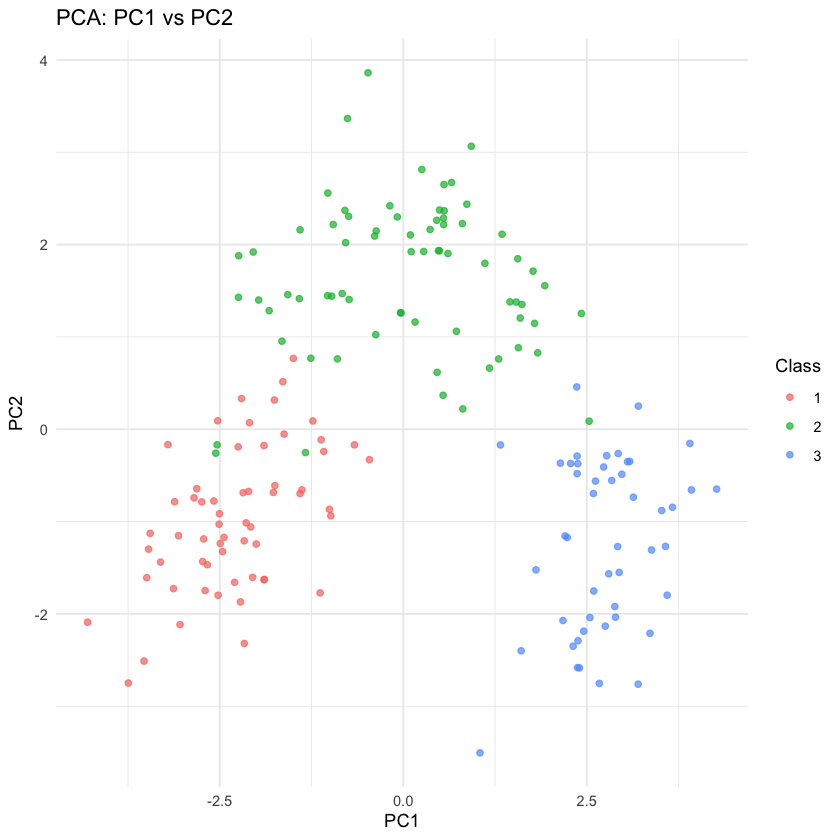

In [6]:
## Part E
pc_df <- as.data.frame(r$x[, 1:2])
pc_df <- pc_df %>%
  mutate(class = wine_scaled$class)
ggplot(pc_df, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(alpha = 0.7) +
  labs(title = "PCA: PC1 vs PC2", x = "PC1", y = "PC2", color = "Class") +
  theme_minimal()

## Part F:
I see wine split up into 3 classes. The first class (Class 1) is mostly negative for PCA1 and PCA2. The second class (Class 2) is mostly positive for PC2 but distributed evenly from -2.5 to 2.5 for PC1. The third class (Class 3) is mostly negative for PC2 and mostly concentrated around 2.5 for Class 3. In the context of wine classes, there is little overlap between each class, which demonstrates that PC1 and PC2 captures the variation separating the classes. The points closer together  show wines that are similar to each other, and the points farther away from each other are different. The fact that most of the classes don't overlap shows that the classes are pretty distinct from one another in terms of the data we have, like alcohol, ash, magnesiu, flavinoids, etc. 

## Part G: 
If there is low variance in my dataset, and all my data is really similar to each other, PCA might fail because 
the principal components would have low variance and would not differentiate between each other. My data would not rotate around anything because all aspects of it would be the same. 

## Part H: 
A vector space is a combination of a set and field for which certain elements are true and in
which you can add vectors together. Vectors can be described with linear coordinates. A manifold is a set which has the property that it resembles a  vector space locally but can be curved or twisted. T-SNE assumes that your data lies on a manifold, not a flat vector space, but that our data is low-dimensional. So, we will be plotting in 2D.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [8]:
## Part A
set.seed(123)
pca_scores <- as.data.frame(r$x[, 1:10])
pca_scores$class <- wine_scaled$class 
pca_unique <- pca_scores %>% distinct()

tsne_input <- pca_unique %>% select(-class)
tsne_result <- Rtsne(tsne_input, dims = 2, perplexity = 30, verbose = TRUE, max_iter = 500)

tsne_df <- as.data.frame(tsne_result$Y)
colnames(tsne_df) <- c("TSNE1", "TSNE2")
tsne_df$class <- pca_unique$class


Performing PCA
Read the 178 x 10 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.611413)!
Learning embedding...
Iteration 50: error is 50.392910 (50 iterations in 0.02 seconds)
Iteration 100: error is 50.181178 (50 iterations in 0.02 seconds)
Iteration 150: error is 51.003086 (50 iterations in 0.02 seconds)
Iteration 200: error is 50.845809 (50 iterations in 0.02 seconds)
Iteration 250: error is 50.796919 (50 iterations in 0.02 seconds)
Iteration 300: error is 0.480252 (50 iterations in 0.02 seconds)
Iteration 350: error is 0.402731 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.373962 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.369167 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.367671 (50 iterations in 0.01 seconds)
Fitting performed in 0.16 seconds.


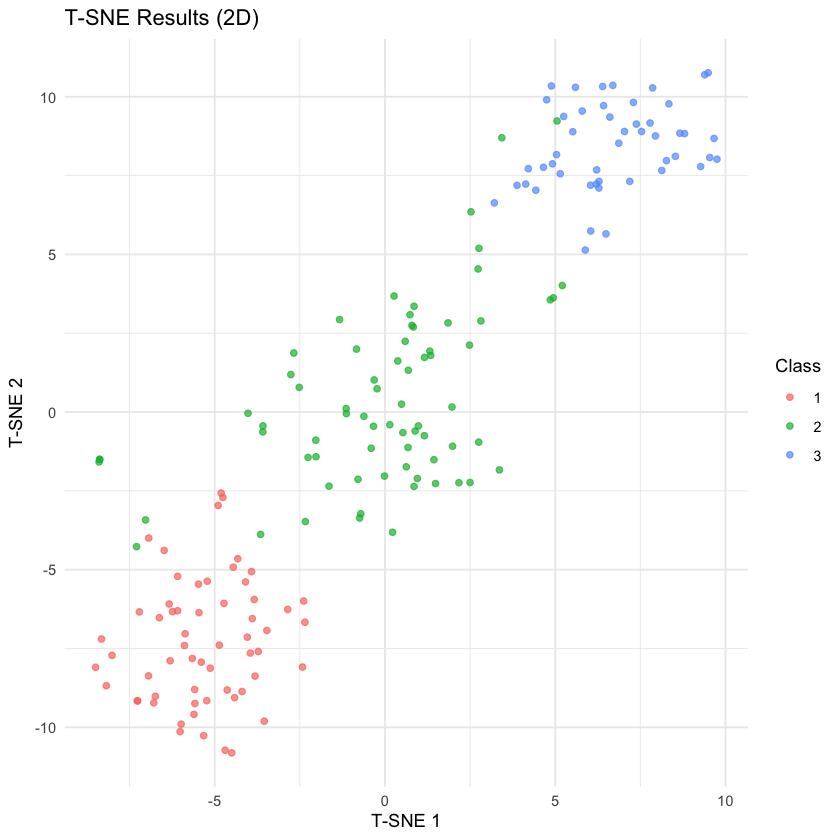

In [9]:
## Part B
colnames(tsne_result$Y) <- c("TSNE1", "TSNE2")
tsne_df <- as_tibble(tsne_result$Y) %>% mutate(class = pca_unique$class)

ggplot(tsne_df, aes(x = TSNE1, y = TSNE2, color = factor(class))) +
  geom_point(alpha = 0.7) +
  labs(
    title = "T-SNE Results (2D)",
    x = "T-SNE 1",
    y = "T-SNE 2",
    color = "Class"
  ) + theme_minimal()

## Part C
T-SNE is essentially untangling what we rotated using PCA in non-linear manifolds, so our data is distributed in a more understandable visual format with a clear relationship. T-SNE has clearer class separation, and also helps us think about the probability of two points in our dataset being close to each other or far apart. It simplifies our data, but on a non-linear scale.

## Part D 
I could see this workflow being useful when creating some sort of composite score from a lot of different
factors, something we do a lot in epidemiology. For example, if we are trying to gain information about a variable like wealth, we could survey people and ask a bunch of different questions about their assets, family, income, etc. This data would probably be on a bunch of different scales and the columns we would get would tell lots of different stories, but when we do a PCA, we could scale and center then split our data up to get a better understanding of variance in our dataset and create a distribution of wealth across our cohort. We could then use T-SNE to visualize our data on a non-linear scale. 